# Regression Trees & Random Forest Regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/miroduman/Desktop/data analytics/week_8


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[[
                                                        'pop_dens',
                                                        'tax_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
        pop_dens   tax_income  dist_supermarket
344  1662.597326  70118.99692        595.010106
350  1662.597326  70118.99692        157.537439
443  1327.635328  80595.52826        147.967057
331  1662.597326  70118.99692         52.959836
290  1662.597326  70118.99692         65.909235 

y_train:
344    1840
350    1570
443    1941
331    2480
290    2800
Name: price, dtype: int64


### Fit the regression tree model

In [4]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=5)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [5]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y_test, y_pred).round(4))

R-squared: -0.0593


### Print text representation of the regression tree

In [6]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

|--- pop_dens <= 3052.31
|   |--- tax_income <= 92842.29
|   |   |--- dist_supermarket <= 890.27
|   |   |   |--- dist_supermarket <= 278.33
|   |   |   |   |--- pop_dens <= 557.99
|   |   |   |   |   |--- value: [1701.88]
|   |   |   |   |--- pop_dens >  557.99
|   |   |   |   |   |--- value: [2113.55]
|   |   |   |--- dist_supermarket >  278.33
|   |   |   |   |--- pop_dens <= 2062.38
|   |   |   |   |   |--- value: [1880.94]
|   |   |   |   |--- pop_dens >  2062.38
|   |   |   |   |   |--- value: [2165.18]
|   |   |--- dist_supermarket >  890.27
|   |   |   |--- dist_supermarket <= 936.07
|   |   |   |   |--- pop_dens <= 762.90
|   |   |   |   |   |--- value: [2300.00]
|   |   |   |   |--- pop_dens >  762.90
|   |   |   |   |   |--- value: [3133.33]
|   |   |   |--- dist_supermarket >  936.07
|   |   |   |   |--- tax_income <= 66986.74
|   |   |   |   |   |--- value: [1785.91]
|   |   |   |   |--- tax_income >  66986.74
|   |   |   |   |   |--- value: [2179.35]
|   |--- tax_income >

### Vizualizing the regression tree

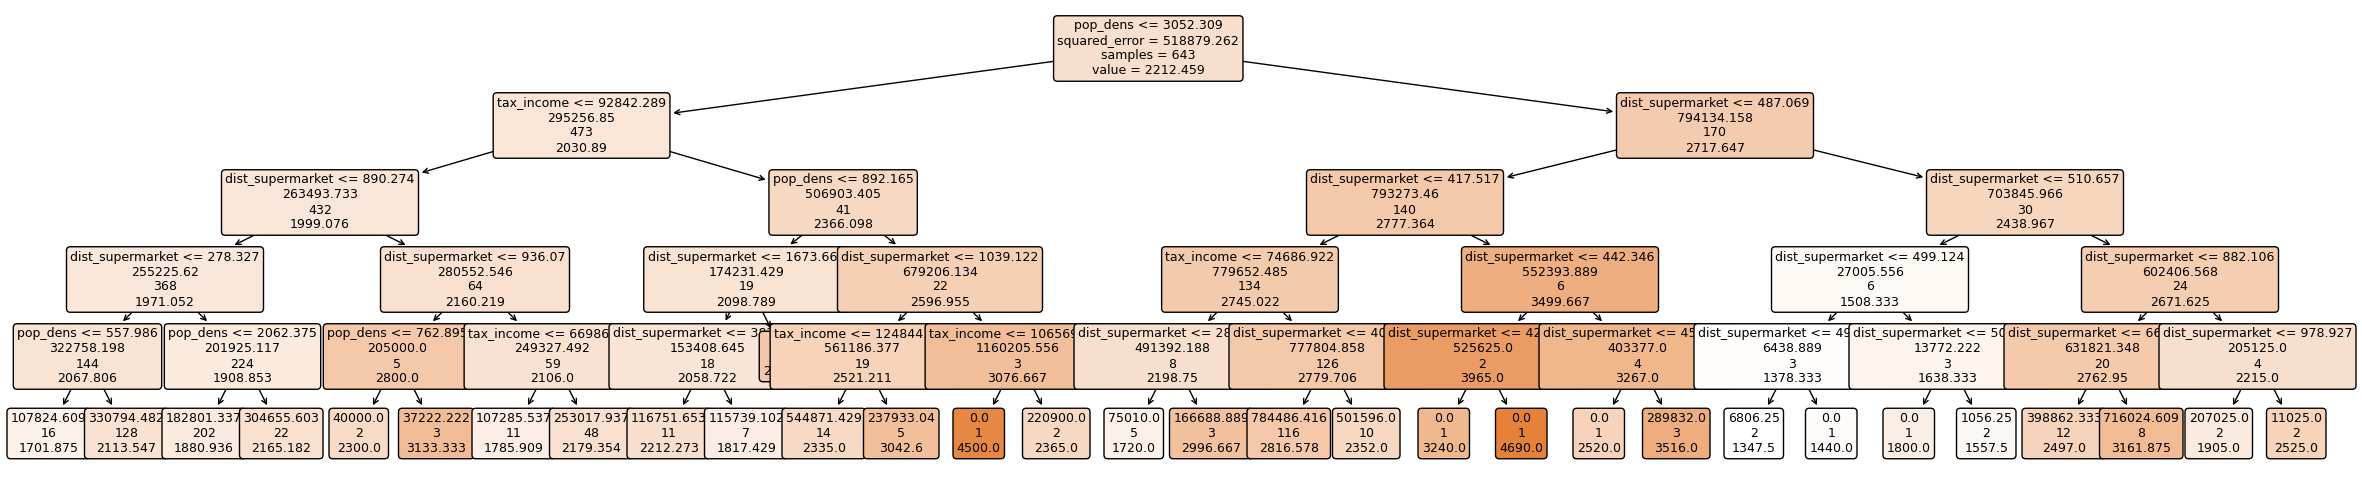

In [16]:
fig = plt.figure(figsize=(30,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [8]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area', 
                                                        'rooms',
                                                            'pop_dens',
                                                            'tax_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area  rooms     pop_dens   tax_income  dist_supermarket
344    75    3.5  1662.597326  70118.99692        595.010106
350    90    3.5  1662.597326  70118.99692        157.537439
443   100    3.5  1327.635328  80595.52826        147.967057
331    94    3.5  1662.597326  70118.99692         52.959836
290    94    3.5  1662.597326  70118.99692         65.909235 

y2_train:
344    1840
350    1570
443    1941
331    2480
290    2800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [9]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf.score(X2_test, y2_test).round(4))

R-squared: 0.5936


### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'rooms', 'tax_income'], dtype='object')
[0.49747017 0.25149778 0.14570629 0.07085025 0.03447552]


<AxesSubplot: ylabel='features'>

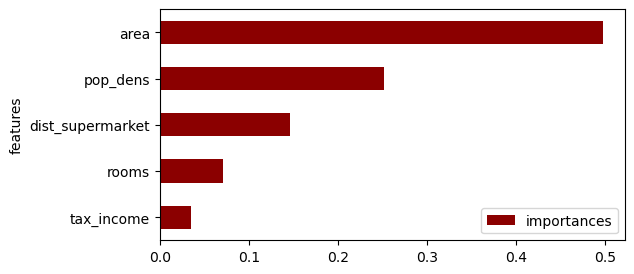

In [10]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))